<a href="https://colab.research.google.com/github/revs1/Natural-Language-Processing/blob/master/Text_Summarization_using_Gensim(Text_ranking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Document Summarization
The idea of document summarization is a bit different from keyphrase extraction or topic modeling. In this case, the end result is still in the form of some document, but with a few sentences based on the length we might want the summary to be. This is similar to an abstract or an executive summary in a research paper. The main objective of automated document summarization is to perform this summarization without involving human input, except for running computer programs. Mathematical and statistical models help in building and automating the task of summarizing documents by observing their content and context.
There are two broad approaches to document summarization using automated techniques. They are described as follows:

 **Extraction-based techniques:** These methods use mathematical and statistical concepts like SVD to extract some key subset of the content from the original document such that this subset of content contains the core information and acts as the focal point of the entire document. This content can be words, phrases, or even sentences. The end result from this approach is a short executive summary of a couple of lines extracted from the original document. No new content is generated in this technique, hence the name extraction-based.
 
**Abstraction-based techniques:** These methods are more complex and sophisticated. They leverage language semantics to create representations and use natural language generation (NLG) techniques where the machine uses knowledge bases and semantic representations to generate text on its own and create summaries just like a human would write them. Thanks to deep learning, we can implement these techniques easily but they require a lot of data and compute.

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We are now going to summarize the documentation (dialogflow basics) of Google's Chatbot building tool - Dialogflow. Let us see, if we are able to get the crux of the tool using our summarization techniques.

In [19]:
DOCUMENT = """
Dialogflow basics
This page describes the basics of using Dialogflow. You should read this page before proceeding to any other documents or quickstarts.
Help users interact with technology
Traditional computer interfaces require structured and predictable input to function properly, which makes the use of these interfaces unnatural and sometimes difficult. If end-users can't easily understand this structured input, they have a hard time figuring out what to do. Ideally, your interfaces can infer what your end-users want, based on the natural language they are using.
For example, consider a simple user request like "What's the weather forecast today?". Other end-users might also ask:
"What's the weather like right now?"
"What's the temperature going to be in San Francisco tomorrow?"
"What will the weather be on the 21st?"
Even with these simple questions, you can see that conversational experiences are hard to implement. Interpreting and processing natural language requires a very robust language parser. Dialogflow handles this for you, so you can provide a high quality conversational end-user experience.
Agents
A Dialogflow agent is a virtual agent that handles conversations with your end-users. It is a natural language understanding module that understands the nuances of human language. Dialogflow translates end-user text or audio during a conversation to structured data that your apps and services can understand. You design and build a Dialogflow agent to handle the types of conversations required for your system.
A Dialogflow agent is similar to a human call center agent. You train them both to handle expected conversation scenarios, and your training does not need to be overly explicit.
Intents
An intent categorizes an end-user's intention for one conversation turn. For each agent, you define many intents, where your combined intents can handle a complete conversation. When an end-user writes or says something, referred to as an end-user expression, Dialogflow matches the end-user expression to the best intent in your agent. Matching an intent is also known as intent classification.
For example, you could create a weather agent that recognizes and responds to end-user questions about the weather. You would likely define an intent for questions about the weather forecast. If an end-user says "What's the forecast?", Dialogflow would match that end-user expression to the forecast intent. You can also define your intent to extract useful information from the end-user expression, like a time or location for the desired weather forecast. This extracted data is important for your system to perform a weather query for the end-user.
 
A basic intent contains the following:
Training phrases: These are example phrases for what end-users might say. When an end-user expression resembles one of these phrases, Dialogflow matches the intent. You don't have to define every possible example, because Dialogflow's built-in machine learning expands on your list with other, similar phrases.
Action: You can define an action for each intent. When an intent is matched, Dialogflow provides the action to your system, and you can use the action to trigger certain actions defined in your system.
Parameters: When an intent is matched at runtime, Dialogflow provides the extracted values from the end-user expression as parameters. Each parameter has a type, called the entity type, which dictates exactly how the data is extracted. Unlike raw end-user input, parameters are structured data that can easily be used to perform some logic or generate responses.
Responses: You define text, speech, or visual responses to return to the end-user. These may provide the end-user with answers, ask the end-user for more information, or terminate the conversation.
The following diagram shows the basic flow for intent matching and responding to the end-user:
 
Entities
Each intent parameter has a type, called the entity type, which dictates exactly how data from an end-user expression is extracted.
Dialogflow provides predefined system entities that can match many common types of data. For example, there are system entities for matching dates, times, colors, email addresses, and so on. You can also create your own custom entities for matching custom data. For example, you could define a vegetable entity that can match the types of vegetables available for purchase with a grocery store agent.
Contexts
Dialogflow contexts are similar to natural language context. If a person says to you "they are orange", you need context in order to understand what they are referring to. Similarly, for Dialogflow to handle an end-user expression like that, it needs to be provided with context in order to correctly match an intent.
Using contexts, you can control the flow of a conversation. You can configure contexts for an intent by setting input and output contexts, which are identified by string names. When an intent is matched, any configured output contexts for that intent become active. While any contexts are active, Dialogflow is more likely to match intents that are configured with input contexts that correspond to the currently active contexts.
The following diagram shows an example that uses context for a banking agent.
 
The end-user asks for information about their checking account.
Dialogflow matches this end-user expression to the CheckingInfo intent. This intent has a checking output context, so that context becomes active.
The agent asks the end-user for the type of information they want about their checking account.
The end-user responds with "my balance".
Dialogflow matches this end-user expression to the CheckingBalance intent. This intent has a checking input context, which needs to be active to match this intent. A similar SavingsBalance intent may also exist for matching the same end-user expression when a savings context is active.
After your system performs the necessary database queries, the agent responds with the checking account balance.
Follow-up intents
You can use follow-up intents to automatically set contexts for pairs of intents. A follow-up intent is a child of its associated parent intent. When you create a follow-up intent, an output context is automatically added to the parent intent and an input context of the same name is added to the follow-up intent. A follow-up intent is only matched when the parent intent is matched in the previous conversational turn. You can also create multiple levels of nested follow-up intents.
Dialogflow provides many predefined follow-up intents for common end-user replies like "yes", "no", or "cancel". You can also create your own follow-up intents to handle custom replies.
Dialogflow Console
Dialogflow provides a web user interface called the Dialogflow Console (visit documentation, open console). You use this console to create, build, and test agents.
The Dialogflow Console is different from the Google Cloud Platform (GCP) Console (visit documentation, open console). The Dialogflow Console is used to manage Dialogflow agents, while the GCP Console is used to manage GCP-specific Dialogflow settings (for example, billing) and other GCP resources.
In most cases you should use the Dialogflow Console to build agents, but you can also use the Dialogflow API to build agents for advanced scenarios.
User interactions with integrations
Dialogflow integrates with many popular conversation platforms like Google Assistant, Slack, and Facebook Messenger. If you want to build an agent for one of these platforms, you should use one of the many integrations options. Direct end-user interactions are handled for you, so you can focus on building your agent. Each integration handles end-user interactions in a platform-specific way, so see the documentation for your integration platform for details.
Fulfillment for integrations
By default, your agent responds to a matched intent with a static response. If you're using one of the integration options, you can provide a more dynamic response by using fulfillment. When you enable fulfillment for an intent, Dialogflow responds to that intent by calling a service that you define. For example, if an end-user wants to schedule a haircut on Friday, your service can check your database and respond to the end-user with availability information for Friday.
Each intent has a setting to enable fulfillment. If an intent requires some action by your system or a dynamic response, you should enable fulfillment for the intent. If an intent without fulfillment enabled is matched, Dialogflow uses the static response you defined for the intent.
When an intent with fulfillment enabled is matched, Dialogflow sends a request to your webhook service with information about the matched intent. Your system can perform any required actions and respond to Dialogflow with information for how to proceed. The following diagram shows the processing flow for fulfillment.

The end-user types or speaks an expression.
Dialogflow matches the end-user expression to an intent and extracts parameters.
Dialogflow sends a webhook request message to your webhook service. This message contains information about the matched intent, the action, the parameters, and the response defined for the intent.
Your service performs actions as needed, like database queries or external API calls.
Your service sends a webhook response message to Dialogflow. This message contains the response that should be sent to the end-user.
Dialogflow sends the response to the end-user.
The end-user sees or hears the response.
User interactions with the API
If you are not using one of the integration options, you must write code that directly interacts with the end-user. You must also directly interact with Dialogflow's API for each conversational turn to send end-user expressions and receive intent matches. The following diagram shows the processing flow when interacting with the API.The end-user types or speaks an expression.
Your service sends this end-user expression to Dialogflow in a detect intent request message.
Dialogflow sends a detect intent response message to your service. This message contains information about the matched intent, the action, the parameters, and the response defined for the intent.
Your service performs actions as needed, like database queries or external API calls.
Your service sends a response to the end-user.
The end-user sees or hears the response.

"""

A bit of preprocessing our document to remove new lines and empty spaces. 

In [20]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with GenSim

In [21]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

Dialogflow translates end-user text or audio during a conversation to structured data that your apps and services can understand.
You can also define your intent to extract useful information from the end-user expression, like a time or location for the desired weather forecast.
When an end-user expression resembles one of these phrases, Dialogflow matches the intent.
Parameters: When an intent is matched at runtime, Dialogflow provides the extracted values from the end-user expression as parameters.
The following diagram shows the basic flow for intent matching and responding to the end-user: Entities Each intent parameter has a type, called the entity type, which dictates exactly how data from an end-user expression is extracted.
Similarly, for Dialogflow to handle an end-user expression like that, it needs to be provided with context in order to correctly match an intent.
Dialogflow matches this end-user expression to the CheckingInfo intent.
Dialogflow matches this end-user express

In [22]:
print(summarize(DOCUMENT, word_count=75, split=False))

You can also define your intent to extract useful information from the end-user expression, like a time or location for the desired weather forecast.
The following diagram shows the basic flow for intent matching and responding to the end-user: Entities Each intent parameter has a type, called the entity type, which dictates exactly how data from an end-user expression is extracted.
Similarly, for Dialogflow to handle an end-user expression like that, it needs to be provided with context in order to correctly match an intent.


In [23]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

104

In [24]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['dialogflow basics page describes basics using dialogflow',
       'read page proceeding documents quickstarts',
       'help users interact technology traditional computer interfaces require structured predictable input function properly makes use interfaces unnatural sometimes difficult'],
      dtype='<U170')

We will be vectorizing our normalized sentences using the TF-IDF feature engineering scheme. 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(340, 104)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
account,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
action,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.89,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.35,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.35,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.35,0.00,0.0,0.0
actions,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.36,0.0,0.0,0.0,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.31,0.0,0.0
active,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
added,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
addresses,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
advanced,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.28,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
agent,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.52,0.0,0.0,0.26,0.53,0.0,0.0,0.24,0.2,0.00,0.23,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.22,0.27,0.0,0.27,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
agents,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.35,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.4,0.0,0.18,0.46,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0
also,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.35,0.00,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.0,0.32,0.0,0.0,0.0,0.00,0.19,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.22,0.0,0.0,0.0,0.00,0.00,0.0,0.0


# Extractive Summarization with TextRank
The TextRank summarization algorithm internally uses the popular PageRank algorithm, which is used by Google for ranking websites and pages. This is used by the Google search engine when providing relevant web pages based on search queries. To understand TextRank better, we need to understand some of the concepts surrounding PageRank. The core algorithm in PageRank is a graph-based scoring or ranking algorithm, where pages are scored or ranked based on their importance.

Websites and pages contain further links embedded in them which link to more pages having more links and this continues across the Internet. This can be represented as a graph-based model where vertices indicate the web pages and edges indicate links among them. This can be used to form a voting or recommendation system such so when one vertex links to another one in the graph it is basically casting a vote.

Vertex importance is decided not only on the number of votes or edges but also the importance of the vertices that are connected to it and their importance.

# Text Rank

Similar to page ranking algorithm, leveraging ranking for text. 

1. Tokenize and extract sentences from the document to be summarized.
2. Decide on the number of sentences, k, that we want in the final summary
3. Build a document-term feature matrix using weights like TF-IDF or Bag of Words.
4. Compute a document similarity matrix by multiplying the matrix by its transpose.
5. Use these documents (sentences in our case) as the vertices and the similarities between each pair of documents as the weight or score coefficient we talked about earlier and feed them to the PageRank algorithm.
6. Get the score for each sentence.
7. Rank the sentences based on score and return the top k sentences.


In [26]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(104, 104)


array([[1.   , 0.143, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.143, 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 0.135, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.135, 1.   , 0.296],
       [0.   , 0.   , 0.   , ..., 0.   , 0.296, 1.   ]])

In [27]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

# Similarity Graph for Visualization

(You would be able to visualize the edges and vertices for a small corpus better)

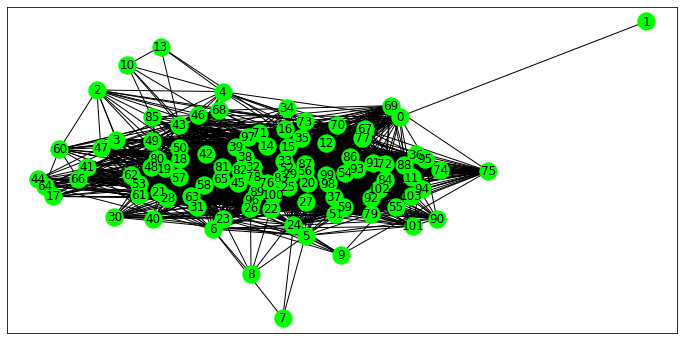

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [29]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.016232317752612583, 98),
 (0.015669463277016963, 93),
 (0.015261099248184825, 25),
 (0.015119552647784017, 83),
 (0.014916313074185138, 20),
 (0.014890188916576784, 56),
 (0.014890188916576784, 52),
 (0.014806164110151461, 100),
 (0.014806164110151461, 89),
 (0.014648110439466825, 87)]

In [30]:
num_sentences = 10
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [31]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

When an end-user writes or says something, referred to as an end-user expression, Dialogflow matches the end-user expression to the best intent in your agent.
", Dialogflow would match that end-user expression to the forecast intent.
Dialogflow matches this end-user expression to the CheckingInfo intent.
Dialogflow matches this end-user expression to the CheckingBalance intent.
When an intent with fulfillment enabled is matched, Dialogflow sends a request to your webhook service with information about the matched intent.
Dialogflow matches the end-user expression to an intent and extracts parameters.
This message contains information about the matched intent, the action, the parameters, and the response defined for the intent.
Dialogflow sends the response to the end-user.
Your service sends this end-user expression to Dialogflow in a detect intent request message.
This message contains information about the matched intent, the action, the parameters, and the response defined for the i